# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

2023-01-01 16:08:25.733649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-01 16:08:30.600351: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 16:08:30.600374: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-01 16:08:39.516666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
tf.__version__

'2.11.0'

In [3]:
tf.keras.__version__

'2.11.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

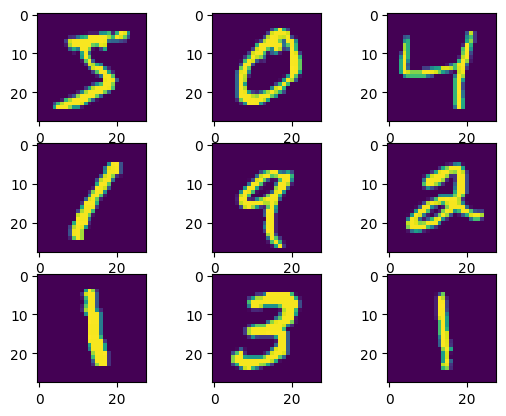

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [5]:
# TODO: Build your model


In [6]:
#Dataset preparation
  #Reshape Data to have one single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

  #Normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

  #One hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
#Validation dataset
valid_size = 5000

np.random.seed(10) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:valid_size]], X_train_full[shuffled_indices[valid_size:]]
y_valid, y_train = y_train_full[shuffled_indices[:valid_size]], y_train_full[shuffled_indices[valid_size:]]

In [8]:
# TODO: Build your model
model = keras.models.Sequential([
    #Convolutional Layers 1
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    #Pooling layer 1
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.4), #Dropout Layer to reduce overfitting
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.4), #Dropout Layer to reduce overfitting
    keras.layers.Dense(10, activation="softmax") #10 Neurons because of digits 0-9
])

2023-01-01 16:08:47.825400: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-01 16:08:47.831866: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-01 16:08:47.831909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (networksciencetezos): /proc/driver/nvidia/version does not exist
2023-01-01 16:08:47.834201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 186s 107ms/step - loss: 0.4752 - accuracy: 0.8543 - val_loss: 0.1275 - val_accuracy: 0.9632
Epoch 2/5
1719/1719 [==============================] - 182s 106ms/step - loss: 0.1727 - accuracy: 0.9514 - val_loss: 0.0755 - val_accuracy: 0.9774
Epoch 3/5
1719/1719 [==============================] - 185s 107ms/step - loss: 0.1224 - accuracy: 0.9657 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 4/5
1719/1719 [==============================] - 180s 105ms/step - loss: 0.0962 - accuracy: 0.9735 - val_loss: 0.0580 - val_accuracy: 0.9838
Epoch 5/5
1719/1719 [==============================] - 179s 104ms/step - loss: 0.0801 - accuracy: 0.9780 - val_loss: 0.0504 - val_accuracy: 0.9860


In [11]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

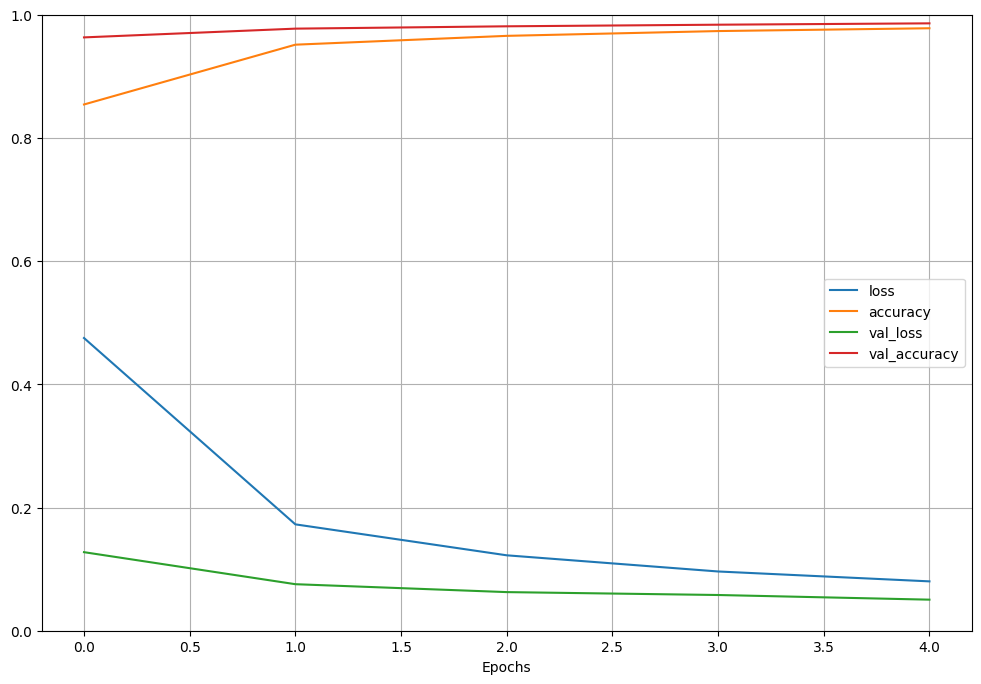

In [12]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.xlabel("Epochs")
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [13]:
model.save('FDS22-M005-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [14]:
model = keras.models.load_model("FDS22-M005-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0440 - accuracy: 0.9863


[0.04401077702641487, 0.986299991607666]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

First I prepared the data by reshaping it to have one channel and normalizing it. After that I further prepared the data with an one hot encoding matrix. The model consists of two Convolutional layers followed by a Flatten and two Dense Layers with a decrasing amount of Neurons starting at 256. The last dense layers uses 10 neurons to represent the characters 0 - 9. to reduce overfitting I used Dropout layers inbetween the Fully connected layers. the only difficulties I met were that no TPU was available when I tried and that my kernel sometimes crashed when using more than 5 Epochs. The amount of layers I choose was sufficient to reach the target accuracy. 